In [3]:
import torch
from experiments.ModelLoader import load_encoder_decoder
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
checkpoint_path: str = "./experiments/checkpoints/vae_checkpoint_epoch_10.pt"
encoder, decoder = load_encoder_decoder(checkpoint_path, latent_dim=256)

In [7]:
latent_dim = 256
decoder.eval()


In [89]:
x = decoder(z).cpu()


In [98]:
[i for i in x.squeeze()[0]]

[tensor([0.4153, 0.4180, 0.4347, 0.4372, 0.4385, 0.4382, 0.4488, 0.4496, 0.4544,
         0.4658, 0.4776, 0.4934, 0.5120, 0.5362, 0.5381, 0.5419, 0.5399, 0.5419,
         0.5233, 0.5113, 0.4927, 0.4566, 0.4057, 0.3602, 0.2582, 0.1704, 0.1184,
         0.0886, 0.0705, 0.0608, 0.0601, 0.0571, 0.0639, 0.0663, 0.0728, 0.0713,
         0.0773, 0.0737, 0.0715, 0.0681, 0.0731, 0.0793, 0.0887, 0.0912, 0.0921,
         0.0959, 0.0984, 0.0988, 0.0969, 0.0975, 0.0917, 0.0840, 0.0829, 0.0846,
         0.0944, 0.0830, 0.0942, 0.1400, 0.2531, 0.3463, 0.4456, 0.5024, 0.5056,
         0.5271], grad_fn=<UnbindBackward0>),
 tensor([0.4301, 0.4389, 0.4480, 0.4532, 0.4626, 0.4578, 0.4618, 0.4622, 0.4726,
         0.4772, 0.4961, 0.5036, 0.5312, 0.5589, 0.5674, 0.5725, 0.5780, 0.5841,
         0.5703, 0.5545, 0.5412, 0.5101, 0.4547, 0.3815, 0.2475, 0.1749, 0.1147,
         0.0928, 0.0698, 0.0643, 0.0581, 0.0569, 0.0665, 0.0654, 0.0625, 0.0658,
         0.0734, 0.0670, 0.0615, 0.0674, 0.0801, 0.0860, 0.0839

(64, 64, 3)


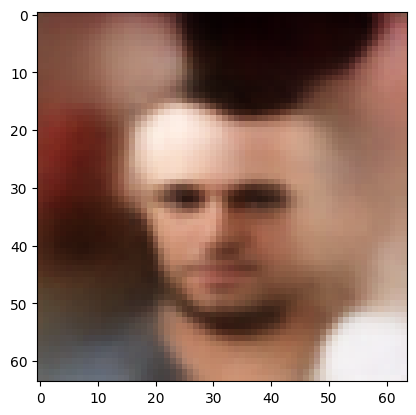

In [88]:
decoder.eval()
z = torch.randn([1, latent_dim, 2, 2]).to(device)
with torch.no_grad():
    x = decoder(z).cpu()
    x_min = x.min()
    x_max = x.max()
    x_norm = (x - x_min) / (x_max - x_min)
    x = x_norm.squeeze().permute(1,2,0).numpy().squeeze()
    # img_arr = (1 + img_arr)/2
    print(x.shape)
    plt.imshow(x, cmap='gray')

In [58]:
img_arr.shape

torch.Size([64, 64, 3])

In [31]:
from modules.SaveOutputs import save_samples_decoder
save_samples_decoder(decoder = decoder, out_dir = "G:\Python\VAE-latent-space-experiment\outputs", latent_dim = latent_dim, device = device)

TypeError: Invalid shape (3, 64, 64) for image data

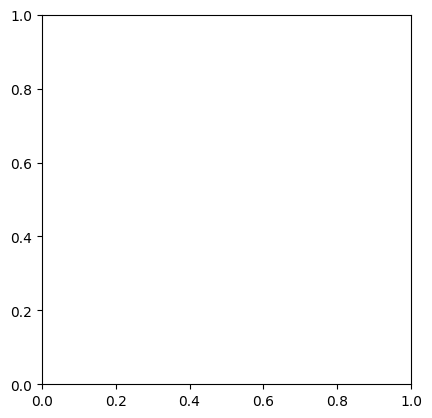

In [12]:
decoder.eval()
with torch.no_grad():
    decoder_inputs = torch.ones([1, latent_dim, 2, 2]).to(device)
    logits = decoder(decoder_inputs)
    x_gen = torch.sigmoid(logits).view(-1, 3, 64, 64).view(-1, 3, 64, 64).detach().squeeze().cpu().numpy()
plt.imshow(x_gen)
plt.axis('off')
plt.show()

In [112]:
latent_dim = 256
sliders = []

for i in range(latent_dim):
    slider = widgets.FloatSlider(
        value=0.0,
        min=-3.0,
        max=3.0,
        step=0.1,
        description=f'z{i}:',
        continuous_update=True,
        orientation='horizontal',
        layout=widgets.Layout(width='400px')
    )
    sliders.append(slider)

def update(change):
    with out:
        clear_output(wait=True)
        # Example: modify image based on slider values
        # modified_img = img * (slider1.value/100) + (slider2.value/100) - (slider3.value/100)
        # model.eval()
        decoder_inputs = torch.tensor([slider.value for slider in sliders]).to(device)
        decoder_input = np.array([slider.value for slider in sliders])
        decoder_input.reshape(4,5)
        print(decoder_inputs)
        decoder.eval()
        with torch.no_grad():
            logits = decoder(decoder_inputs)
            x_gen = torch.sigmoid(logits).view(-1, 1, 28, 28).view(-1, 1, 28, 28).detach().squeeze().cpu().numpy()
        plt.imshow(x_gen, cmap='gray')
        plt.axis('off')
        plt.show()

for slider in sliders:
    slider.observe(update, names='value')

In [113]:
out = widgets.Output()
ui = widgets.HBox([widgets.VBox(sliders), out])

display(ui)